In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import np_utils, to_categorical
from keras.optimizers import SGD, Adam
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import zipfile


In [2]:
# open zipped dataset
with zipfile.ZipFile("A_Z Handwritten Data.zip") as z:
   # open the csv file in the dataset
   with z.open("A_Z Handwritten Data.csv") as f:

      # read the dataset
      data = pd.read_csv(f).astype('float32')

print(data.head(10))

     0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1 

In [3]:
# Split data the X - Our data , and y - the prdict label
X = data.drop('0', axis=1)
y = data['0']

In [4]:
# Reshaping the data in csv file so that it can be displayed as an image...

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28, 28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28, 28))


print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)


Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [5]:
# Dictionary for getting characters from index values...
word_dict = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 
             7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N',
             14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 
             21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}


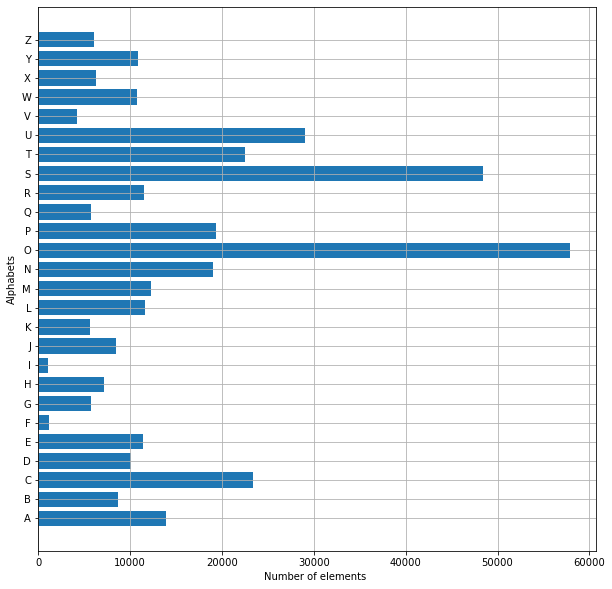

In [6]:
y_int = np.int0(y)
count = np.zeros(26, dtype='int')
for i in y_int:
    count[i] +=1
alphabets = []
for i in word_dict.values():
    alphabets.append(i)
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)
plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

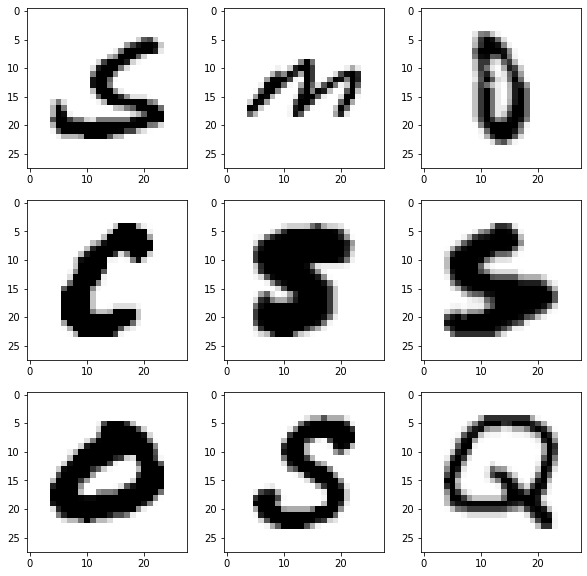

In [7]:
# Shuffling the data ...
shuff = shuffle(train_x[:100])

fig, ax = plt.subplots(3, 3, figsize=(10, 10))
axes = ax.flatten()

for i in range(9):
    axes[i].imshow(np.reshape(shuff[i], (28, 28)), cmap="Greys")
plt.show()


In [8]:
# Reshaping the training & test dataset so that it can be put in the model...

train_X = train_x.reshape(
    train_x.shape[0], train_x.shape[1], train_x.shape[2], 1)
print("New shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2], 1)
print("New shape of train data: ", test_X.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


In [9]:
train_yOHE = to_categorical(train_y, num_classes=26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes=26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [10]:
# CNN model...

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3),
                 activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3),
                 activation='relu', padding='valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64, activation="relu"))
model.add(Dense(128, activation="relu"))

model.add(Dense(26, activation="softmax"))


In [12]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(
    monitor='val_loss', min_delta=0, patience=2, verbose=1, mode='auto')


history = model.fit(train_X, train_yOHE, epochs=10, callbacks=[
                    reduce_lr, early_stop],  validation_data=(test_X, test_yOHE))

Epoch 1/10
9312/9312 [==============================] - 43s 5ms/step - loss: 0.0954 - accuracy: 0.9732 - val_loss: 0.0700 - val_accuracy: 0.9809 - lr: 0.0010
Epoch 2/10
9312/9312 [==============================] - 46s 5ms/step - loss: 0.0679 - accuracy: 0.9811 - val_loss: 0.0671 - val_accuracy: 0.9825 - lr: 0.0010
Epoch 3/10
9312/9312 [==============================] - 45s 5ms/step - loss: 0.0597 - accuracy: 0.9835 - val_loss: 0.0735 - val_accuracy: 0.9815 - lr: 0.0010
Epoch 4/10
9312/9312 [==============================] - 44s 5ms/step - loss: 0.0247 - accuracy: 0.9931 - val_loss: 0.0315 - val_accuracy: 0.9924 - lr: 2.0000e-04
Epoch 5/10
9312/9312 [==============================] - 44s 5ms/step - loss: 0.0145 - accuracy: 0.9960 - val_loss: 0.0296 - val_accuracy: 0.9937 - lr: 2.0000e-04
Epoch 6/10
9312/9312 [==============================] - 42s 5ms/step - loss: 0.0098 - accuracy: 0.9972 - val_loss: 0.0308 - val_accuracy: 0.9941 - lr: 2.0000e-04
Epoch 7/10
9312/9312 [==================

The validation accuracy is : [0.9808698892593384, 0.9824674725532532, 0.9815008640289307, 0.992401659488678, 0.9937441349029541, 0.9941334128379822, 0.9951939582824707]
The training accuracy is : [0.9731977581977844, 0.9810746312141418, 0.9835414290428162, 0.9931098222732544, 0.9959827065467834, 0.9971674084663391, 0.9987548589706421]
The validation loss is : [0.06996806710958481, 0.0670599490404129, 0.07345740497112274, 0.03148951753973961, 0.02961021102964878, 0.030752645805478096, 0.03054370917379856]
The training loss is : [0.09537450969219208, 0.0679488331079483, 0.059651076793670654, 0.02474660985171795, 0.014486958272755146, 0.009812865406274796, 0.004635837860405445]


C:\Users\ivan\AppData\Local\Temp\ipykernel_7368\752978302.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  acc_plot.set_xticklabels([0, 1, 2, 3, 4, 5, 6, 7])
C:\Users\ivan\AppData\Local\Temp\ipykernel_7368\752978302.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  loss_plot.set_xticklabels([0, 1, 2, 3, 4, 5, 6, 7])


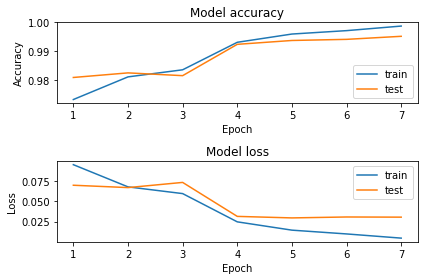

In [13]:
# Displaying the accuracies & losses for train & validation set...

print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

fig = plt.figure()

acc_plot = plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')

loss_plot = plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
acc_plot.set_xticklabels([0, 1, 2, 3, 4, 5, 6, 7])
loss_plot.set_xticklabels([0, 1, 2, 3, 4, 5, 6, 7])
fig.tight_layout()


In [14]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.summary()
model.save(r'model_hand.h5')

import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, 'C:/Users/ivan/Desktop/New folder/mnist-web-app-master/src/assets/modeldir')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

1/1 [==============================] - 0s 15ms/step
(74490, 28, 28, 1)


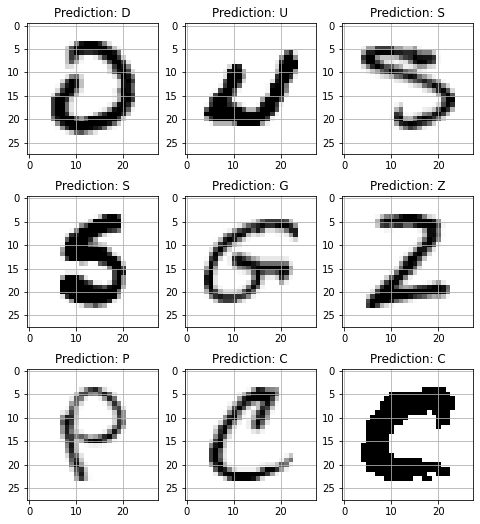

In [21]:
# Making model predictions...

pred = model.predict(test_X[:9])
print(test_X.shape)


# Displaying some of the test images & their predicted labels...

fig, axes = plt.subplots(3, 3, figsize=(8, 9))
axes = axes.flatten()

for i, ax in enumerate(axes):
    img = np.reshape(test_X[i], (28, 28))
    ax.imshow(img, cmap="Greys")
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()